In [ ]:
import networkx as nx
import matplotlib.pyplot as plt    

class GraphVisualization:
  def __init__(self):      
    self.visual = []
        
  def add_edge(self, a, b):
    temp = [a, b]
    self.visual.append(temp)
        
  def visualize(self):
    G = nx.DiGraph()
    G.add_edges_from(self.visual)

    plt.figure(figsize=(8,8))
    
    # y_off = -0.0
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='aqua')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos={k:([v[0], v[1]]) for k,v in pos.items()}, font_size=10)
    
    plt.show()

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

def format_url(base_url, end_url):  
  formatted_url = end_url

  if end_url.startswith('./'):
    parsed_url = urlparse(base_url)
    paths = parsed_url.path.split('/')
    new_path = '/'.join(paths[:-1]) + end_url
    formatted_url = f'{parsed_url.scheme}://{parsed_url.netloc}{new_path}{parsed_url.query}'

  if end_url.startswith('../'):
    parsed_url = urlparse(base_url)
    paths = parsed_url.path.split('/')
    new_path = '/'.join(paths[:-2]) + end_url
    formatted_url = f'{parsed_url.scheme}://{parsed_url.netloc}{new_path}{parsed_url.query}'

  if end_url.startswith('//'):
    formatted_url = f'https:{end_url}'
  
  if end_url.startswith('/'):
    parsed_url = urlparse(base_url)
    formatted_url = f'{parsed_url.scheme}://{parsed_url.netloc}{end_url}{parsed_url.query}'

  if end_url.startswith('?'):
    parsed_url = urlparse(base_url)
    formatted_url = f'{parsed_url.scheme}://{parsed_url.netloc}{parsed_url.path}{end_url}'

  if urlparse(formatted_url).scheme == '':
    formatted_url = f'https://{formatted_url}'

  return formatted_url.rstrip('/')
      
def filter_link_urls(link_url):
  return link_url is not None and '#' not in link_url

def generate_graph(G, urls, url, url_lim, re_lim):
  if url not in urls:
      urls.append(url)

  r = requests.get(url)
  soup = BeautifulSoup(r.content, 'html.parser')

  links = soup.find_all('a')
  link_urls = [link.get('href') for link in links]
  # print(link_urls) # Debug
  # Format URLs
  link_urls = [format_url(url, link_url) for 
               link_url in 
               filter(filter_link_urls, link_urls)]
  # Remove duplidcate URLs
  link_urls = list(set(link_urls))

  for link_url in link_urls[:url_lim]:
    # print(url + ' --> ' + link_url) # Debug

    if link_url not in urls:
      urls.append(link_url)

    # G.add_edge(url, link_url)
    G.add_edge(urls.index(url), urls.index(link_url))

    # Recursive
    # print(f'{url} ({urlparse(url).netloc}) && {link_url} ({urlparse(link_url).netloc}) --> ', 
    #       urlparse(url).netloc == urlparse(link_url).netloc) # Debug
    if urlparse(link_url).netloc == urlparse(url).netloc and re_lim > 0:
      generate_graph(G, urls, link_url, url_lim, re_lim-1)

def generate_sitemap(url, url_lim, re_lim):
  # Add scheme if no scheme supplied
  if urlparse(url).scheme == '':
    url = f'https://{url}'

  G = GraphVisualization()
  urls = []
  
  generate_graph(G, urls, url, url_lim, re_lim)  
  
  G.visualize()
  print('\nDaftar URL:')
  for k in range(len(urls)):
    print(f'{k}. {urls[k]}')

In [ ]:
# generate_sitemap(url='https://uny.ac.id', url_lim=5, re_lim=3)

URL: https://google.com
Berapa banyak URL per halaman diambil? 5
Berapa jauh halaman dijelajahi? 3



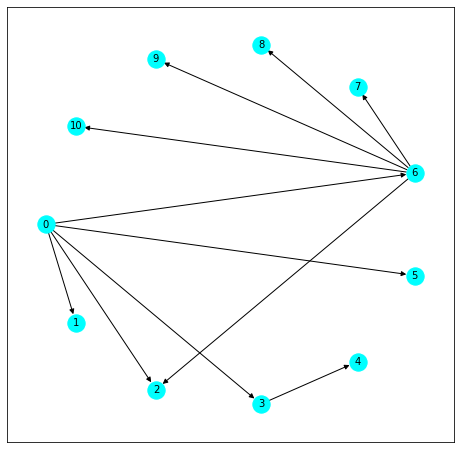


Daftar URL:
0. https://google.com
1. https://www.google.com/intl/en/about/products?tab=wh
2. https://mail.google.com/mail/?tab=wm
3. https://google.com/services
4. https://smallbusiness.withgoogle.com/?subid=us-en-et-g-awa-a-g_hpbfoot1_1!o2&utm_source=google&utm_medium=ep&utm_campaign=google_hpbfooter&utm_content=google_hpbfooter&gmbsrc=us-en_US-et-gs-z-gmb-s-z-u~sb-g4sb_srvcs-u
5. https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/&ec=GAZAAQ
6. https://google.com/advanced_search?hl=en&authuser=0
7. https://support.google.com/websearch?p=adv_safesearch&hl=en
8. https://keep.google.com
9. https://www.google.com/chrome/?brand=CHZO&utm_source=google.com&utm_medium=desktop-app-launcher&utm_campaign=desktop-app-launcher&utm_content=chrome-logo&utm_keyword=CHZO
10. https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/advanced_search%3Fhl%3Den%26authuser%3D0&ec=GAZAAQ


In [ ]:
url = input('URL: ')
url_lim = int(input('Berapa banyak URL per halaman diambil? '))
re_lim = int(input('Berapa jauh halaman dijelajahi? '))

print()
generate_sitemap(url, url_lim, re_lim)